
Iteration 1
Cluster 1: [0, 3]
Cluster 2: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Iteration 2
Cluster 1: [0, 3, 2, 4, 5, 6]
Cluster 2: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Iteration 3
Cluster 1: [0, 3, 2, 4, 5, 6]
Cluster 2: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Final Clustering:
Cluster 1: [0, 3, 2, 4, 5, 6]
Cluster 2: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Splitting operation:
Cluster 1: [0, 3, 2, 4, 5, 6]
Cluster 2: [7, 8, 9, 10, 11, 12, 13]
Cluster 3: [1, 2, 4, 5, 6]


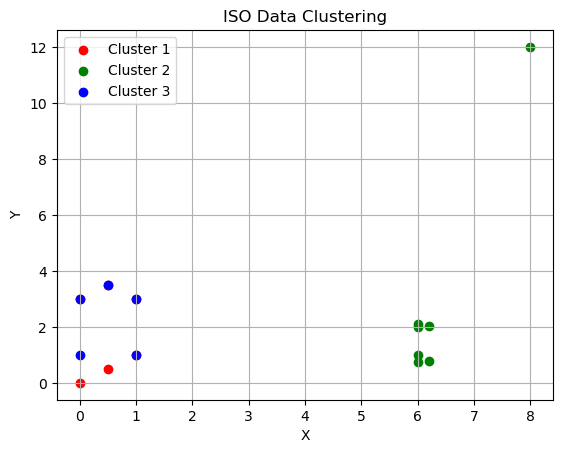

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def iso_data_clustering(data, iter_start=2, min_elements=1, max_merge=3, split_size=0.5, min_dist=4, no_clusters=1):
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def calculate_centroid(cluster_data):
        return np.mean(cluster_data, axis=0)

    # Step 1: Initialize cluster centroids to the first two data points
    seed_points = data[:2]
    clusters = [[i] for i in range(2)]

    iteration = 1
    while True:
        # Step 2: Assign each sample to the nearest cluster
        changed = False
        for idx, sample in enumerate(data[2:], 2):
            nearest_centroid_idx = np.argmin([euclidean_distance(sample, centroid) for centroid in seed_points])
            if idx not in clusters[nearest_centroid_idx]:
                clusters[nearest_centroid_idx].append(idx)
                changed = True

        print(f"\nIteration {iteration}")
        for idx, cluster in enumerate(clusters, 1):
            print(f"Cluster {idx}: {cluster}")

        # Step 3: Compute centroids of resulting clusters
        new_seed_points = np.array([calculate_centroid(data[cluster]) for cluster in clusters])

        # Step 4: Check if at least one sample changed clusters and number of iterations is less than iter_start
        if not changed or iteration >= iter_start:
            break

        seed_points = new_seed_points
        iteration += 1

    # Step 5: Discard clusters with fewer than min_elements samples
    clusters = [cluster for cluster in clusters if len(cluster) >= min_elements]

    print("\nFinal Clustering:")
    for idx, cluster in enumerate(clusters, 1):
        print(f"Cluster {idx}: {cluster}")

    # Step 6: Check if number of clusters is greater than or equal to 2 * no_clusters or the number of this iteration is even
    if len(clusters) >= 2 * no_clusters and iteration % 2 == 0:
        print("\nMerging operation:")
        # Step 7: Merge clusters with centroids distance less than min_dist
        merged = True
        merge_count = 0
        while merged and merge_count < max_merge:
            merged = False
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    centroid_i = calculate_centroid(data[clusters[i]])
                    centroid_j = calculate_centroid(data[clusters[j]])
                    distance = euclidean_distance(centroid_i, centroid_j)
                    if distance < min_dist:
                        clusters[i] += clusters[j]
                        del clusters[j]
                        merged = True
                        merge_count += 1
                        break

        for idx, cluster in enumerate(clusters, 1):
            print(f"Cluster {idx}: {cluster}")

    # Step 6 (continued): Check if number of clusters is less than or equal to no_clusters / 2 or the number of this iteration is odd
    if len(clusters) <= no_clusters / 2 or iteration % 2 == 1:
        print("\nSplitting operation:")
        # Step 9: Find a cluster with standard deviation exceeding split_size * original standard deviation
        z = data[:, 0]  # Use X-coordinate for splitting
        std_dev_original = np.std(z)
        split_needed = False
        split_clusters = []

        for cluster in clusters:
            z_cluster = data[cluster, 0]
            std_dev_cluster = np.std(z_cluster)
            if std_dev_cluster > split_size * std_dev_original:
                split_needed = True
                mean_z = np.mean(z_cluster)
                cluster_set1 = [i for i in cluster if data[i, 0] >= mean_z]
                cluster_set2 = [i for i in cluster if data[i, 0] < mean_z]
                split_clusters.append(cluster_set1)
                split_clusters.append(cluster_set2)
            else:
                split_clusters.append(cluster)

        if split_needed:
            clusters = split_clusters

        for idx, cluster in enumerate(clusters, 1):
            print(f"Cluster {idx}: {cluster}")

    return clusters

# Example usage:
X = [0.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 6.2, 6.2, 8.0]
Y = [0.0, 1.0, 3.0, 0.5, 3.5, 1.0, 3.0, 0.75, 1.0, 2.0, 2.1, 0.80, 2.05, 12.0]
data = np.column_stack((X, Y))
final_clusters = iso_data_clustering(data, iter_start=4, min_elements=4, max_merge=3, split_size=0.7, min_dist=5, no_clusters=2)

# Plot the clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for idx, cluster in enumerate(final_clusters):
    x = data[cluster, 0]
    y = data[cluster, 1]
    plt.scatter(x, y, c=colors[idx % len(colors)], label=f'Cluster {idx+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('ISO Data Clustering')
plt.grid(True)
plt.show()
